In [7]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import os 
import cv2
import numpy as np
import keras
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, AveragePooling2D

from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ReduceLROnPlateau
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint

from keras.applications.mobilenet_v2 import MobileNetV2
from keras.utils import to_categorical
from tensorflow.keras.layers import Input
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
#from keras.applications.efficientnet import preprocess_input
#from keras.applications.efficientnet import EfficientNetB7

ModuleNotFoundError: No module named 'imutils'

In [ ]:
path = 'drive/MyDrive/train_plant'
categories = os.listdir(path)
categories=sorted(categories)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))

In [ ]:
print(label_dict)
print(categories)
print(labels)

{'corn_common_rust_train': 0, 'corn_healthy_train': 1, 'corn_northern_leaf_blight_train': 2, 'tomato_early_blight_train': 3, 'tomato_healthy_train': 4, 'tomato_late_blight_train': 5}
['corn_common_rust_train', 'corn_healthy_train', 'corn_northern_leaf_blight_train', 'tomato_early_blight_train', 'tomato_healthy_train', 'tomato_late_blight_train']
[0, 1, 2, 3, 4, 5]


In [ ]:
data = []
label = []

In [ ]:
for c in categories:
    folder_path = os.path.join(path,c)
    image_names = os.listdir(folder_path)
    for image_name in image_names:
        img_path = os.path.join(folder_path,image_name)
        #img = cv2.imread(img_path)
        img=load_img(img_path, target_size=(224,224))
        img=img_to_array(img)
        img=preprocess_input(img)
        data.append(img)
        label.append(label_dict[c])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.3,random_state=42)
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
datagen=ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,  input_tensor=Input(shape=(224, 224, 3))) 

#baseModel = EfficientNetB7(weights="imagenet", include_top=False,  input_tensor=Input(shape=(224, 224, 3))) 
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)


for layer in baseModel.layers:  
    layer.trainable = False

#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='min')
#history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)
history=model.fit(datagen.flow(x_train, y_train, batch_size=32),callbacks=[checkpoint],  steps_per_epoch=len(x_train) // 32,  validation_data=(x_test, y_test), validation_steps=len(x_test) // 32,  epochs=50)

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7866

78/78 [==============================] - 63s 659ms/step - loss: 0.5614 - accuracy: 0.7866 - val_loss: 0.1777 - val_accuracy: 0.9333
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 0.2490 - accuracy: 0.9031

78/78 [==============================] - 49s 633ms/step - loss: 0.2490 - accuracy: 0.9031 - val_loss: 0.1507 - val_accuracy: 0.9426
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.9301

78/78 [==============================] - 50s 645ms/step - loss: 0.1731 - accuracy: 0.9301 - val_loss: 0.1218 - val_accuracy: 0.9565
Epoch 4/50
78/78 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9469

78/78 [==============================] - 50s 636ms/step - loss: 0.1434 - accuracy: 0.9469 - val_loss: 0.1198 - val_accuracy: 0.9546
Epoch 5/50
78/78 [==============================] - ETA: 0s - loss: 0.1289 - accuracy: 0.9514

78/78 [==============================] - 48s 621ms/step - loss: 0.1289 - accuracy: 0.9514 - val_loss: 0.1186 - val_accuracy: 0.9556
Epoch 6/50
78/78 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9538

78/78 [==============================] - 50s 637ms/step - loss: 0.1327 - accuracy: 0.9538 - val_loss: 0.1082 - val_accuracy: 0.9639
Epoch 7/50
78/78 [==============================] - 30s 390ms/step - loss: 0.1135 - accuracy: 0.9550 - val_loss: 0.1219 - val_accuracy: 0.9481
Epoch 8/50
78/78 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9558

78/78 [==============================] - 50s 646ms/step - loss: 0.1178 - accuracy: 0.9558 - val_loss: 0.0983 - val_accuracy: 0.9620
Epoch 9/50
78/78 [==============================] - 31s 392ms/step - loss: 0.1098 - accuracy: 0.9570 - val_loss: 0.1169 - val_accuracy: 0.9620
Epoch 10/50
78/78 [==============================] - 31s 391ms/step - loss: 0.1178 - accuracy: 0.9618 - val_loss: 0.1057 - val_accuracy: 0.9639
Epoch 11/50
78/78 [==============================] - 31s 397ms/step - loss: 0.0967 - accuracy: 0.9634 - val_loss: 0.0996 - val_accuracy: 0.9620
Epoch 12/50
78/78 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9674

78/78 [==============================] - 49s 637ms/step - loss: 0.0813 - accuracy: 0.9674 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 13/50
78/78 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9715

78/78 [==============================] - 51s 652ms/step - loss: 0.0904 - accuracy: 0.9715 - val_loss: 0.0881 - val_accuracy: 0.9694
Epoch 14/50
78/78 [==============================] - 33s 418ms/step - loss: 0.0863 - accuracy: 0.9686 - val_loss: 0.1375 - val_accuracy: 0.9491
Epoch 15/50
78/78 [==============================] - 32s 414ms/step - loss: 0.0959 - accuracy: 0.9670 - val_loss: 0.1011 - val_accuracy: 0.9657
Epoch 16/50
78/78 [==============================] - 31s 400ms/step - loss: 0.0828 - accuracy: 0.9707 - val_loss: 0.0893 - val_accuracy: 0.9694
Epoch 17/50
78/78 [==============================] - 31s 401ms/step - loss: 0.0866 - accuracy: 0.9686 - val_loss: 0.1072 - val_accuracy: 0.9630
Epoch 18/50
78/78 [==============================] - 31s 400ms/step - loss: 0.0824 - accuracy: 0.9707 - val_loss: 0.1102 - val_accuracy: 0.9630
Epoch 19/50
78/78 [==============================] - 32s 417ms/step - loss: 0.0717 - accuracy: 0.9728 - val_loss: 0.1021 - val_accuracy: 0.9620
Epoc

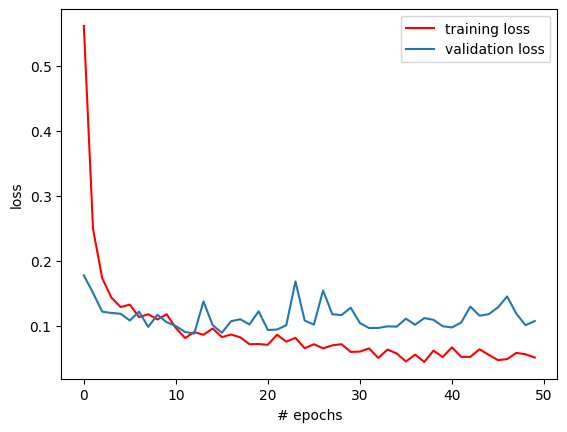

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

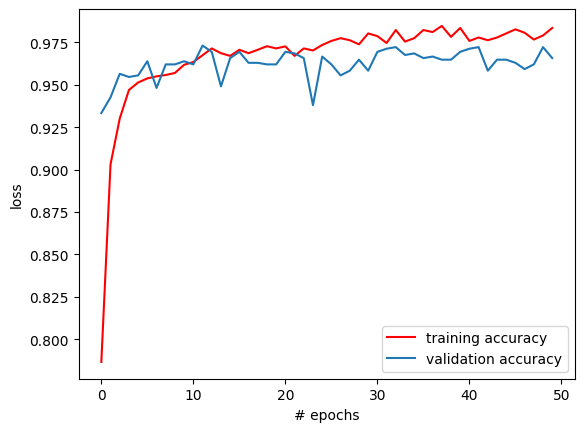

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save("mobilenetv2_plant.h5")